In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2203009\AppData\local\Temp\ipykernel_1692\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# URL Git Hub

https://github.com/LECOQLomann/SAE-6-01-VCOD

# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [14]:
%matplotlib notebook
%matplotlib inline

import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st


### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

C:\Users\e2203009\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 8.64MB/s]

Extracting model files...
Path to dataset files: C:\Users\e2203009\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [3]:
import os
import shutil

# Répertoire cible dans votre projet
project_dir = r"H:\cours\SAE 6-01-VCOD\projet_notebook"

# Créer le répertoire (s'il n'existe pas)
os.makedirs(project_dir, exist_ok=True)

# Chemin du fichier source dans le cache KaggleHub
cache_file = r"C:\Users\e2203009\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1\ds_salaries.csv"

# Copier le fichier vers le répertoire du projet
shutil.copy(cache_file, project_dir)

print("Fichier copié avec succès !")


Fichier copié avec succès !


In [6]:
# Lire le fichier depuis le répertoire du projet
import pandas as pd

# Chemin du fichier CSV
csv_file = r"H:\cours\SAE 6-01-VCOD\projet_notebook\ds_salaries.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_file)

# Afficher les premières lignes du fichier
print(df.head())


# Commentaire du dictionnaire de données :

# work_year: The year the salary was paid.
# experience_level: The experience level in the job during the year
# employment_type: The type of employment for the role
# job_title: The role worked in during the year.
# salary: The total gross salary amount paid.
# salary_currency: The currency of the salary paid as an ISO 4217 currency code.
# salaryinusd: The salary in USD
# employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
# remote_ratio: The overall amount of work done remotely
# company_location: The country of the employer's main office or contracting branch
# company_size: The median number of people that worked for the company during the year


   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [9]:
#données manquantes 
print(df.isna().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


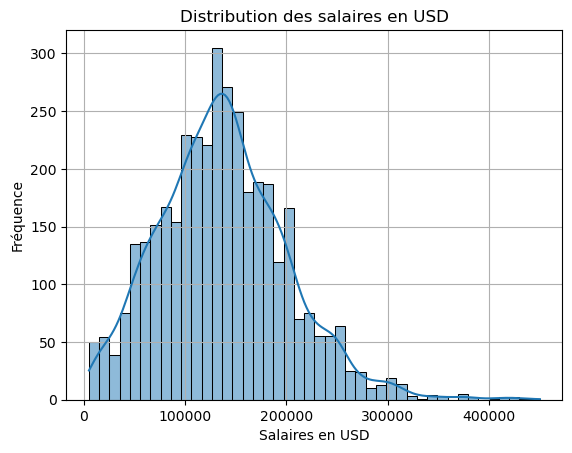

On constate un salaire moyen qui semble s'élever à 150 000$. Il y a également de bas salaire, cela correspond surement à des catégories de contrat particulières, comme le Freelance ou le Part-Time. Il y a également de très hauts salaire, on voit qu'il sont peu nombreux mais qu'ils peuvent s'élever très haut. On voit que cela s'étale entre 320 000$ et 460 000$.


In [104]:
# Distribution des salaires en USD

# %matplotlib inline 

sns.histplot(data=df, x='salary_in_usd', kde=True)  # kde=True pour la courbe de densité
plt.title('Distribution des salaires en USD')
plt.xlabel('Salaires en USD')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

print("On constate un salaire moyen qui semble s'élever à 150 000$. Il y a également de bas salaire, cela correspond surement à des catégories de contrat particulières, comme le Freelance ou le Part-Time. Il y a également de très hauts salaire, on voit qu'il sont peu nombreux mais qu'ils peuvent s'élever très haut. On voit que cela s'étale entre 320 000$ et 460 000$.")

In [107]:
# liste des pays concerné par l'étude 

print(df['company_location'].unique())
print("Cette liste représente un éventail de pays de différents continents, incluant des nations d'Europe, d'Asie, d'Amérique, d'Afrique, et d'Océanie, illustrant une diversité géographique et culturelle.")

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
Cette liste représente un éventail de pays de différents continents, incluant des nations d'Europe, d'Asie, d'Amérique, d'Afrique, et d'Océanie, illustrant une diversité géographique et culturelle.


In [113]:
#Salaire moyen par rôle
res1 = df[['job_title','salary_in_usd']].groupby('job_title').mean()
res1 = res1.sort_values(['salary_in_usd'], ascending=False).head()
print(res1)
print("\nCe top 5 des jobs les mieux rémunérés montre que le titre 'Lead' semble assurer un salaire confortable. On constate également que tous ces métiers contiennent le mot 'Data', ce qui n'est pas étonnant étant donné le sujet de l'analyse. Le métier de Data Science Tech Lead a un salaire moyen 50% supérieur au deuxième salaire le plus élevé, ce qui est impresionnant.") 

# Salaire moyen par pays
res2 = df[['employee_residence','salary_in_usd']].groupby('employee_residence').mean()
res2 = res2.sort_values(['salary_in_usd'], ascending=False)
print(res2)
print("\nLes salaires varient considérablement selon le niveau de développement économique des pays, avec des salaires élevés en Israël, aux États-Unis et au Canada, tandis que des pays comme la Moldavie, l'Indonésie et le Maroc présentent des salaires plus bas, souvent en raison de coûts de vie plus abordables. Les disparités reflètent les secteurs dominants, la productivité et les conditions économiques locales.")

# Salaires moyens par niveau d'expérience
res3 = df[['experience_level','salary_in_usd']].groupby('experience_level').mean()
res3 = res3.sort_values(['salary_in_usd'], ascending=False)
print(res3)
print(" \nLes salaires augmentent considérablement avec le niveau d'expérience, les experts et seniors gagnant bien plus que les profils de niveau intermédiaire et débutant, ce qui est typique dans les industries où l'expertise technique et la gestion de projets complexes sont valorisées. Quand on y réfléchit cela tombe sous le sens.")


                          salary_in_usd
job_title                              
Data Science Tech Lead       375000.000
Cloud Data Architect         250000.000
Data Lead                    212500.000
Data Analytics Lead          211254.500
Principal Data Scientist     198171.125

Ce top 5 des jobs les mieux rémunérés montre que le titre 'Lead' semble assurer un salaire confortable. On constate également que tous ces métiers contiennent le mot 'Data', ce qui n'est pas étonnant étant donné le sujet de l'analyse. Le métier de Data Science Tech Lead a un salaire moyen 50% supérieur au deuxième salaire le plus élevé, ce qui est impresionnant.
                    salary_in_usd
employee_residence               
IL                  423834.000000
MY                  200000.000000
PR                  166000.000000
US                  152822.011651
CA                  132222.905882
...                           ...
MD                   18000.000000
ID                   15000.000000
SK            

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [118]:
# Filtrer les salaires pour un pays donné (ex : US)
res4 = df.query("employee_residence == 'US'")
res4 = res4.sort_values('salary_in_usd', ascending=False)
print(res4)
print("Ici nous voyons les plus hauts salaires aux états-unis, avec tous les informations du type catégorie de contrat, job...")

      work_year experience_level employment_type  \
3522       2020               MI              FT   
3747       2021               MI              FT   
3675       2021               EX              CT   
3750       2020               SE              FT   
3463       2022               SE              FT   
...         ...              ...             ...   
1          2023               MI              CT   
2          2023               MI              CT   
3387       2022               SE              FT   
3042       2022               MI              FT   
3043       2022               MI              FT   

                               job_title  salary salary_currency  \
3522                  Research Scientist  450000             USD   
3747  Applied Machine Learning Scientist  423000             USD   
3675            Principal Data Scientist  416000             USD   
3750                      Data Scientist  412000             USD   
3463                 Data Analytics

In [121]:
# Top 5 des entreprises qui paient le plus par pays
res5 = df[['company_location','salary_in_usd']].groupby('company_location').mean()
res5 = res5.sort_values(['salary_in_usd'], ascending=False).head()
print(res5)
print("Nous voyosn ici que les 5 pays qui paient le mieux leurs employés dans ce secteur sont Israel, Porto Rico, USA, Russie et Canada")

# Top 5 des entreprises qui paient le plus par taille d'entreprise
res5 = df[['company_size','salary_in_usd']].groupby('company_size').mean()
res5 = res5.sort_values(['salary_in_usd'], ascending=False).head()
print(res5)
print(" \nLes entreprise de taille moyenne sont celles avec le salaire moyen le plus élevé, ce qui est étonnant, nous aurioons pu penser que ce serait les grandes entreprises. les écarts de salaires sont conséquents, et il y a la même différence entre chaque catégorie.")

                  salary_in_usd
company_location               
IL                271446.500000
PR                167500.000000
US                151822.009539
RU                140333.333333
CA                131917.689655
Nous voyosn ici que les 5 pays qui paient le mieux leurs employés dans ce secteur sont Israel, Porto Rico, USA, Russie et Canada
              salary_in_usd
company_size               
M             143130.548367
L             118300.982379
S              78226.682432
 
Les entreprise de taille moyenne sont celles avec le salaire moyen le plus élevé, ce qui est étonnant, nous aurioons pu penser que ce serait les grandes entreprises. les écarts de salaires sont conséquents, et il y a la même différence entre chaque catégorie.


In [134]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
res6 = df[['job_title','salary_in_usd']].groupby('job_title').mean()
res6= res6[res6['salary_in_usd']>100000]
res6 = res6.sort_values(['job_title'], ascending=True)
print("Rôles avec un salaire moyen > 100,000 USD :")
print(res6)
print("Il y a de nombreux jobs dont le salaire moyen est supérieur à 100 000$")

# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)

res7 = df[df['remote_ratio'] == 100]
res7 = res7.groupby('employee_residence').size().reset_index(name='count')
res7 = res7.sort_values(['count'], ascending=False)
print(res7)
print("Les etats-unis sont loins devant en terme de télétravail à 100%. Mais il faudrait une vraie proportion pour s'assurer que ce n'st pas simplement du au nombre d'observations aux USA compéré aux autres.")

#Version améliorée de l'analyse sur le télétravail
res7b = df[['employee_residence','remote_ratio']].groupby('employee_residence').mean()
res7b = res7b.sort_values(['remote_ratio'], ascending=False)
print(res7b)
print("Cette analyse de taux de télétravail est bien plus pertinente : On voit le taux de télétravail moyen de chaque pays, et on voit les pays avec le taux moyen le plus élevé. Les USA ne sont plus seul en tête.")

Rôles avec un salaire moyen > 100,000 USD :
                                          salary_in_usd
job_title                                              
AI Developer                              136666.090909
AI Scientist                              110120.875000
Analytics Engineer                        152368.631068
Applied Data Scientist                    113726.300000
Applied Machine Learning Scientist        109452.833333
Applied Scientist                         190264.482759
BI Analyst                                104888.888889
BI Developer                              129846.153846
Big Data Architect                        125802.500000
Business Intelligence Engineer            174150.000000
Cloud Data Architect                      250000.000000
Cloud Database Engineer                   155000.000000
Computer Vision Engineer                  143536.111111
Data Analyst                              108716.227124
Data Analytics Lead                       211254.500000
Data

In [124]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
res8=df[df['remote_ratio'] == 100]
res8=res8['salary_in_usd'].mean()
print("Salaire moyen des employés à distance : ",round(res8,2),"$")

# Comparer salaires moyens pour deux catégories
df['employment_type'].unique()
res9=df[['salary_in_usd','employment_type']].groupby('employment_type').mean()
res9=res9.sort_values('salary_in_usd', ascending = False)
print('Comparaison des salaires moyens par catégorie de contrat (FT = Full-Time ; CT = Contract ; FL = Freelance ; PT = Part-Time) :', res9)
print("Les employés en full-time sont bien mieux payés que les autres, mais un freelancer ne fait pas des mois complets, un contractor non plus, et les pert-time ,non plus donc ces chiffres sont difficilement comparables. Il faudrait  un taux horaire pour comparer.")



Salaire moyen des employés à distance :  136481.45 $
Comparaison des salaires moyens par catégorie de contrat (FT = Full-Time ; CT = Contract ; FL = Freelance ; PT = Part-Time) :                  salary_in_usd
employment_type               
FT               138314.199570
CT               113446.900000
FL                51807.800000
PT                39533.705882
Les employés en full-time sont bien mieux payés que les autres, mais un freelancer ne fait pas des mois complets, un contractor non plus, et les pert-time ,non plus donc ces chiffres sont difficilement comparables. Il faudrait  un taux horaire pour comparer.


In [125]:
# Ajouter une colonne pour les fourchettes de salaires

def assign_salary_range(salary):
    if salary < 50000:
        return '<50k'
    elif 50000 <= salary < 100000:
        return '50k-100k'
    elif 100000 <= salary < 150000:
        return '100k-150k'
    else:
        return '150k+'

df['salary_range'] = df['salary_in_usd'].apply(assign_salary_range)

print(df)

      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence

In [130]:
# Analyse des corrélations
# Relation entre télétravail et salaire

correlation = df['salary_in_usd'].corr(df['remote_ratio'])
print(f"Corrélation entre télétravail (remote_ratio) et salaire : {correlation}")
print("Cela signifie qu'il n'y a pas ed corrélation, car -0.06 est une très faible corrélation négative. Il est très peu probable qu'il y ait un lien entre ces deux variables.")


Corrélation entre télétravail (remote_ratio) et salaire : -0.06417098519057557
Cela signifie qu'il n'y a pas ed corrélation, car -0.06 est une très faible corrélation négative. Il est très peu probable qu'il y ait un lien entre ces deux variables.


In [131]:
# Salaire moyen par taille d'entreprise 

res10 = df[['company_size','salary_in_usd']].groupby('company_size').mean()
res10 = res10.sort_values(['salary_in_usd'], ascending=False)
print(res10)
print(" \nLes entreprise de taille moyenne sont celles avec le salaire moyen le plus élevé, ce qui est étonnant, nous aurioons pu penser que ce serait les grandes entreprises. les écarts de salaires sont conséquents, et il y a la même différence entre chaque catégorie.")

              salary_in_usd
company_size               
M             143130.548367
L             118300.982379
S              78226.682432
 
Les entreprise de taille moyenne sont celles avec le salaire moyen le plus élevé, ce qui est étonnant, nous aurioons pu penser que ce serait les grandes entreprises. les écarts de salaires sont conséquents, et il y a la même différence entre chaque catégorie.


In [129]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail

pivot_table = df.pivot_table(
    index='experience_level',   # Niveau d'expérience
    columns='remote_ratio',      # Taux de télétravail
    values='salary_in_usd',      # Salaire
    aggfunc='mean'              # Moyenne des salaires
)

print("Tableau croisé des salaires :", pivot_table)

Tableau croisé des salaires : remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
